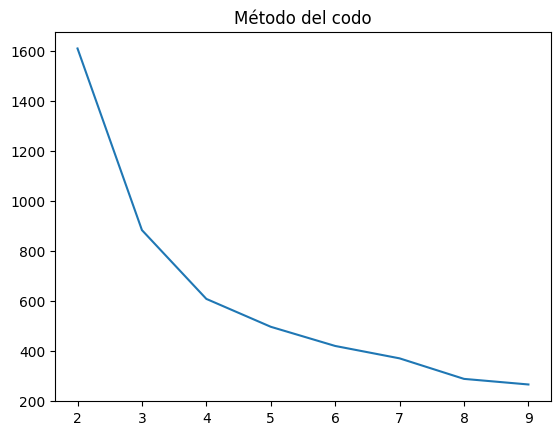

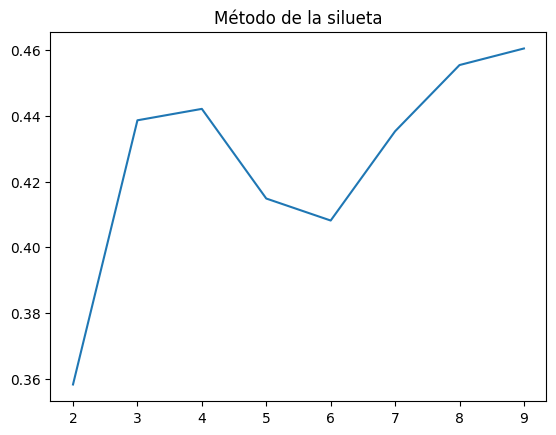

[3 3 0 ... 1 1 0]
Centroide:
[[-0.79938268  0.9484599 ]
 [ 0.77542042 -0.82414888]
 [-0.8103506  -0.9288038 ]
 [ 1.05161991  0.82448494]]

Inercia:
606.9395686959829

Silueta:
0.4420914666601882


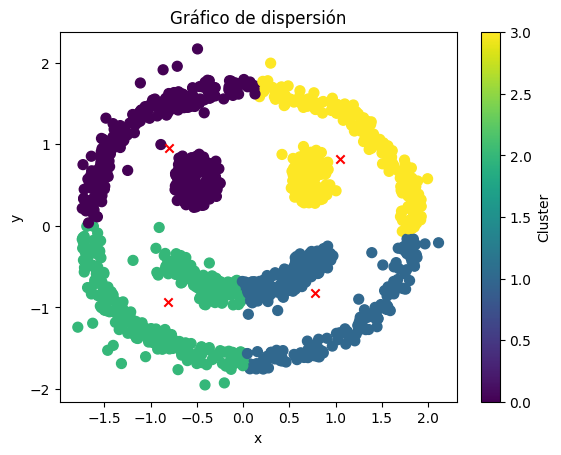


[1]

[1]

[1]


c:\Users\FUNDAMENTOS IA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\FUNDAMENTOS IA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\FUNDAMENTOS IA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

datos = pd.read_csv('face.csv')
#sns.pairplot(datos)
x = datos[['x','y']]
# Normalizar los datos
x = (x - x.mean()) / x.std()
# Eliminar valores nulos
x = x.dropna()

k_valores = range(2, 10)
inercias = []
siluetas = []
for k in k_valores:
    modelo = KMeans(k)
    modelo.fit(x)
    inercias.append(modelo.inertia_)
    silueta = silhouette_score(x, modelo.labels_)
    siluetas.append(silueta)

# Graficar el codo 
plt.plot(k_valores, inercias)
plt.title("Método del codo")
plt.show()

# Graficar la silueta
plt.plot(k_valores, siluetas)
plt.title("Método de la silueta")
plt.show()

# Crear modelo 
modelo = KMeans(4, random_state=123)
# Ajustar modelo
modelo.fit(x)
# Agregar etiquetas
etiquetas = modelo.labels_
centroide = modelo.cluster_centers_
print(etiquetas)
print(f"Centroide:\n{centroide}")
print(f"\nInercia:\n{modelo.inertia_}")
silueta = silhouette_score(x, etiquetas)
print(f"\nSilueta:\n{silueta}")

# Gráfico de dispersión 
grafica = plt.scatter(x['x'], x['y'], c=etiquetas, s=50, cmap='viridis')
# Graficar los centroides
plt.scatter(centroide[:,0], centroide[:,1], marker='x', color='red')
plt.colorbar(grafica, label ='Cluster')
plt.title("Gráfico de dispersión")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#Nueva Dispersión 
X=np.array([[18,7]])
X=(X-X.mean())/X.std()
prediccion=modelo.predict(X)
print(f"\n{prediccion}")

#Nueva Dispersión
X=np.array([[15,10]])
X=(X-X.mean())/X.std()
prediccion=modelo.predict(X)
print(f"\n{prediccion}")

#Nueva Dispersión
X=np.array([[13.2,8.2]])
X=(X-X.mean())/X.std()
prediccion=modelo.predict(X)
print(f"\n{prediccion}")


